In [4]:
! lamin load scprint

💡 found cached instance metadata: /home/ml4ig1/.lamin/instance--jkobject--scprint.env
💡 loaded instance: jkobject/scprint


In [2]:
from lightning.pytorch import Trainer, seed_everything
from lightning.pytorch.callbacks import ModelCheckpoint, StochasticWeightAveraging, EarlyStopping, LearningRateMonitor, LearningRateFinder

seed_everything(42, workers=True)

from scprint import scPrint
from scprint.trainer import TrainingMode
from scdataloader import DataModule

import torch
torch.set_float32_matmul_precision('medium')

%load_ext autoreload
%autoreload 2

Seed set to 42


💡 lamindb instance: jkobject/scprint


In [3]:
# TODO: drop tissue & dev stage until part or is taken in account

hierarchical_labels = [
    "cell_type_ontology_term_id", #1
    "tissue_ontology_term_id",
    "disease_ontology_term_id", # 2
    "development_stage_ontology_term_id",
    "assay_ontology_term_id", #3
    'self_reported_ethnicity_ontology_term_id', #4
]
labels_to_pred = hierarchical_labels+[
    'sex_ontology_term_id', #5
    "organism_ontology_term_id", #6
]
all_labels = labels_to_pred+[
    #'dataset_id',
    'cell_culture',
    "heat_diff",
    "total_counts",
    "nnz",
    "dpt_group",
]

gene_emb = '../data/temp/embeddings.parquet'
d_model=128

In [4]:
# we might want not to order the genes by expression (or do it?)
# we might want to not introduce zeros and 

In [19]:
import bionty as bt
import lamindb as ln

In [22]:
bt.Tissue.df()

uid                                     name     ontology_id  \
id                                                                         
15544  5UvrTNyI                    neuroendocrine system  UBERON:8600018   
15543  7kIGCVYW                 bronchopulmonary segment  UBERON:8600017   
15542  4uvtmGdo   anterior sector of right lobe of liver  UBERON:8600016   
15541  5MxzVcVx  posterior sector of right lobe of liver  UBERON:8600015   
15540  4E1xtUfW           submucosal gland ciliated duct  UBERON:8600014   
...         ...                                      ...             ...   
5      211MAMNf                        entorhinal cortex  UBERON:0002728   
4      215GMGL1                   superior frontal gyrus  UBERON:0002661   
3      1fIFAQJY                                    brain  UBERON:0000955   
2      3INnNQYI                                   retina  UBERON:0000966   
1      6ofXVZOx                                      eye  UBERON:0000970   

       abbr                                           synonyms  \
id                                                               
15544  None                                               None   
15543  None                                       lung segment   
15542  None  right hepatic anterior sector|medial sector of...   
15541  None  lateral sector of right lobe of liver|right he...   
15540  None                                               None   
...     ...                                                ...   
5      None                                    entorhinal area   
4      None        superior frontal convolution|marginal gyrus   
3      None                                               None   
2      None  inner layer of eyeball|retina of camera-type e...   
1      None                                               None   

                                             description  public_source_id  \
id                                                                           
15544  A Regulatory System Of The Body That Integrate...              50.0   
15543  A Discrete Anatomical Unit Of The Lung That Is...              50.0   
15542  The Anterior Sector Of The Right Lobe Of The L...              50.0   
15541  The Posterior Sector Of The Right Lobe Of The ...              50.0   
15540  A Ciliated Tubular Structure In A Submucosal G...              50.0   
...                                                  ...               ...   
5      Component Of The Temporal Lobe On The Mesial S...              24.0   
4      Component Of The Frontal Lobe, Lateral Aspect....              24.0   
3      The Brain Is The Center Of The Nervous System ...              24.0   
2      The Retina Is The Innermost Layer Or Coating A...              24.0   
1                           An Organ That Detects Light.              24.0   

                            created_at                       updated_at  \
id                                                                        
15544 2024-02-16 12:49:29.772489+00:00 2024-02-16 12:49:29.772496+00:00   
15543 2024-02-16 12:49:29.772463+00:00 2024-02-16 12:49:29.772470+00:00   
15542 2024-02-16 12:49:29.772438+00:00 2024-02-16 12:49:29.772445+00:00   
15541 2024-02-16 12:49:29.772412+00:00 2024-02-16 12:49:29.772420+00:00   
15540 2024-02-16 12:49:29.772386+00:00 2024-02-16 12:49:29.772394+00:00   
...                                ...                              ...   
5     2023-11-22 11:11:14.653074+00:00 2023-11-22 11:11:14.653159+00:00   
4     2023-11-22 11:10:51.108239+00:00 2023-11-22 11:10:51.108279+00:00   
3     2023-11-22 11:10:51.108041+00:00 2023-11-22 11:10:51.108128+00:00   
2     2023-11-22 10:22:36.748725+00:00 2023-11-22 10:22:36.748765+00:00   
1     2023-11-22 10:22:36.748529+00:00 2023-11-22 10:22:36.748620+00:00   

       created_by_id  
id                    
15544              1  
15543              1  
15542              1  
15541              1  
15540              1  
...         

In [21]:
ln.save(bt.Tissue.from_values(bt.Tissue.public().df().index, field="ontology_id"))

In [ ]:
bt.

In [7]:
bt.Tissue.df().set_index("ontology_id")

uid                                   name  \
ontology_id                                                                  
CL:0002633 (cell culture)  7Vr0ZQ92  respiratory basal cell (cell culture)   
CL:0002334 (cell culture)  3k3HgyaN            preadipocyte (cell culture)   
CL:0000115 (cell culture)  1EnYIOj6        endothelial cell (cell culture)   
UBERON:0001728             7iihMvXz                            nasopharynx   
CL:0002335 (cell culture)  46GiqBb1      brown preadipocyte (cell culture)   
...                             ...                                    ...   
UBERON:0002728             211MAMNf                      entorhinal cortex   
UBERON:0002661             215GMGL1                 superior frontal gyrus   
UBERON:0000955             1fIFAQJY                                  brain   
UBERON:0000966             3INnNQYI                                 retina   
UBERON:0000970             6ofXVZOx                                    eye   

                           abbr  \
ontology_id                       
CL:0002633 (cell culture)  None   
CL:0002334 (cell culture)  None   
CL:0000115 (cell culture)  None   
UBERON:0001728             None   
CL:0002335 (cell culture)  None   
...                         ...   
UBERON:0002728             None   
UBERON:0002661             None   
UBERON:0000955             None   
UBERON:0000966             None   
UBERON:0000970             None   

                                                                    synonyms  \
ontology_id                                                                    
CL:0002633 (cell culture)                                               None   
CL:0002334 (cell culture)                                               None   
CL:0000115 (cell culture)                                               None   
UBERON:0001728                            nasal part of pharynx|rhinopharynx   
CL:0002335 (cell culture)                                               None   
...                                                                      ...   
UBERON:0002728                                               entorhinal area   
UBERON:0002661                   superior frontal convolution|marginal gyrus   
UBERON:0000955                                                          None   
UBERON:0000966             inner layer of eyeball|retina of camera-type e...   
UBERON:0000970                                                          None   

                                                                 description  \
ontology_id                                                                    
CL:0002633 (cell culture)                                               None   
CL:0002334 (cell culture)                                               None   
CL:0000115 (cell culture)                                               None   
UBERON:0001728             The Section Of The Pharynx That Lies Above The...   
CL:0002335 (cell culture)                                               None   
...                                                                      ...   
UBERON:0002728             Component Of The Temporal Lobe On The Mesial S...   
UBERON:0002661             Component Of The Frontal Lobe, Lateral Aspect....   
UBERON:0000955             The Brain Is The Center Of The Nervous System ...   
UBERON:0000966             The Retina Is The Innermost Layer Or Coating A...   
UBERON:0000970                                  An Organ That Detects Light.   

                           public_source_id                       created_at  \
ontology_id                                                                    
CL:0002633 (cell culture)               NaN 2023-12-06 15:26:42.064803+00:00   
CL:0002334 (cell culture)               NaN 2023-12-06 14:45:17.011415+00:00   
CL:0000115 (cell culture)               NaN 2023-12-06 14:30:19.517740+00:00   
UBERON:0001728                         50.0 2023-12-06 08:18:29.973111+00:00   

In [23]:
datamodule = DataModule(
    collection_name="preprocessed dataset",
    gene_embeddings=gene_emb,
    all_labels=all_labels,
    hierarchical_labels=hierarchical_labels,
    organisms=["NCBITaxon:9606"],
    how="most expr",
    max_len=1000,
    add_zero_genes=100,
    label_to_weight=labels_to_pred,
    label_to_pred=labels_to_pred,
    batch_size=64,
    num_workers=16,
    validation_split=0.1,
    test_split=0.1)
testfiles = datamodule.setup()

won't do any check but we recommend to have your dataset coming from local storage


TypeError: Registry.df() got an unexpected keyword argument 'include'

In [7]:
model = scPrint(
    genes = datamodule.genes,
    d_model = d_model,
    nhead = 4,
    d_hid = d_model,
    nlayers = 4,
    layers_cls = [d_model],
    labels = datamodule.labels,
    cls_hierarchy = datamodule.cls_hierarchy,
    dropout= 0.1,
    transformer = "flash",
    precpt_gene_emb = gene_emb,
    gene_pos_enc = datamodule.gene_pos,
    mvc_decoder = "inner product",
    label_decoders = datamodule.decoders,
    fused_dropout_add_ln = False
)

2024-02-15 17:37:50,635:INFO - Created a temporary directory at /local/scratch/tmp/tmp0dspj7n_
2024-02-15 17:37:50,636:INFO - Writing /local/scratch/tmp/tmp0dspj7n_/_remote_module_non_scriptable.py
2024-02-15 17:37:50,636:INFO - Writing /local/scratch/tmp/tmp0dspj7n_/_remote_module_non_scriptable.py


In [7]:
# create a function to transform an scGPT checkpoint to an scPrint's
# ckpt = torch.load("../../scGPT/save/model_e6.pt")
# scPrint.load_from_checkpoint("../../scGPT/save/model_e6.pt")

In [8]:
from lightning.pytorch.loggers import TensorBoardLogger
from lightning.pytorch.loggers import WandbLogger

wandb_logger = WandbLogger(project="scprint_test", save_dir="../data/tensorboard")
wandb_logger.watch(model, log='all', log_freq=50, log_graph=True)

#tlogger = TensorBoardLogger(save_dir="../data/tensorboard")
#tlogger.log_graph(model, i)


2024-02-15 10:27:58,398:ERROR - Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: jkobject (ml4ig). Use `wandb login --relogin` to force relogin


wandb: logging graph, to disable use `wandb.watch(log_graph=False)`


In [9]:
#from lightning.pytorch.profilers import PyTorchProfiler
#pytorch_prof = PyTorchProfiler("../data/tensorboard", emit_nvtx=False, group_by_input_shape=True, record_shapes=True, profile_memory=True, with_stack=True, on_trace_ready=torch.profiler.tensorboard_trace_handler("../data/tensorboard/"),)

In [8]:
chckp = ModelCheckpoint(monitor="val_loss", save_top_k=-1)
trainingmode = TrainingMode(do_denoise=True, noise=[0.3], do_cce=True, cce_sim=0.5, do_ecs=True, ecs_threshold = 0.3, ecs_scale = 1.0, do_mvc=False, do_adv_cls=False, do_next_tp=False, class_scale = 5000.0, mask_ratio=[0.15, 0.3])
es = EarlyStopping(patience=10, monitor='val_loss')
swa = StochasticWeightAveraging(swa_lrs= 0.01)
lrm = LearningRateMonitor(logging_interval="step")
lrf = LearningRateFinder(mode="exponential",)

trainer = Trainer(precision="16-mixed", gradient_clip_val=10, max_time={"hours": 1}, limit_train_batches=20000, limit_test_batches=0.03, limit_val_batches=3000, callbacks=[chckp, trainingmode, es, lrm, lrf]) #detect_anomaly=True, fast_dev_run=20, overfit_batches=10, limit_train_batches=1, limit_val_batches=0


Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [21]:
model.lr, model.hparams.lr

(0.001, 0.001)

In [11]:
# sanity. should be overfiting.
#trainer = Trainer(precision=16-mixed, overfit_batches=1, limit_val_batches=0, check_val_every_n_epoch=200, log_every_n_steps=1, logger=wandb_logger)

these files will be considered test datasets:
    /home/ml4ig1/scprint/.lamindb/BljRloq1xjcxRNDpejzI.h5ad
perc test:  0.00226129182087695


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/torch/masked/maskedtensor/core.py:156: UserWarning: The PyTorch API of MaskedTensors is in prototype stage and will change in the near future. Please open a Github issue for features requests and see our documentation on the torch.masked module for further information about the project.
  warnings.warn(("The PyTorch API of MaskedTensors is in prototype stage "
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/anndata/_core/anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


         Falling back to preprocessing with `sc.pp.pca` and default params.


/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


AnnData object with n_obs × n_vars = 5434 × 128
    obs: 'pred_cell_type_ontology_term_id', 'pred_disease_ontology_term_id', 'pred_assay_ontology_term_id', 'pred_self_reported_ethnicity_ontology_term_id', 'pred_sex_ontology_term_id', 'pred_organism_ontology_term_id', 'cell_type_ontology_term_id', 'disease_ontology_term_id', 'assay_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'organism_ontology_term_id', 'leiden'
    uns: 'neighbors', 'umap', 'leiden'
    obsm: 'X_pca', 'X_umap'
    obsp: 'distances', 'connectivities'


/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data f

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/torch/masked/maskedtensor/core.py:156: UserWarning: The PyTorch API of MaskedTensors is in prototype stage and will change in the near future. Please open a Github issue for features requests and see our documentation on the torch.masked module for further information about the project.
  warnings.warn(("The PyTorch API of MaskedTensors is in prototype stage "
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/torch/masked/maskedtensor/core.py:161: UserWarning: It is not recommended to create a MaskedTensor with a tensor that requires_grad. To avoid this, you can use data.clone().detach()
  warnings.warn("It is not recommended to create a MaskedTensor with a tensor that requires_grad. "
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/logger_connector/result.py:212: UserWarning: You called `self.log('cce', ...)` in your `training_step` but the value nee

         Falling back to preprocessing with `sc.pp.pca` and default params.


/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


AnnData object with n_obs × n_vars = 5433 × 128
    obs: 'pred_cell_type_ontology_term_id', 'pred_disease_ontology_term_id', 'pred_assay_ontology_term_id', 'pred_self_reported_ethnicity_ontology_term_id', 'pred_sex_ontology_term_id', 'pred_organism_ontology_term_id', 'cell_type_ontology_term_id', 'disease_ontology_term_id', 'assay_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'organism_ontology_term_id', 'leiden'
    uns: 'neighbors', 'umap', 'leiden'
    obsm: 'X_pca', 'X_umap'
    obsp: 'distances', 'connectivities'


/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data f

Sanity Checking: 0it [00:00, ?it/s]

/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/torch/masked/maskedtensor/core.py:156: UserWarning: The PyTorch API of MaskedTensors is in prototype stage and will change in the near future. Please open a Github issue for features requests and see our documentation on the torch.masked module for further information about the project.
  warnings.warn(("The PyTorch API of MaskedTensors is in prototype stage "
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/anndata/_core/anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


         Falling back to preprocessing with `sc.pp.pca` and default params.


/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


AnnData object with n_obs × n_vars = 109 × 128
    obs: 'pred_cell_type_ontology_term_id', 'pred_disease_ontology_term_id', 'pred_assay_ontology_term_id', 'pred_self_reported_ethnicity_ontology_term_id', 'pred_sex_ontology_term_id', 'pred_organism_ontology_term_id', 'cell_type_ontology_term_id', 'disease_ontology_term_id', 'assay_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'organism_ontology_term_id', 'leiden'
    uns: 'neighbors', 'umap', 'leiden'
    obsm: 'X_pca', 'X_umap'
    obsp: 'distances', 'connectivities'


/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data f

couldn't log to tensorboard
couldn't log to wandb


Training: 0it [00:00, ?it/s]

/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/torch/masked/maskedtensor/core.py:156: UserWarning: The PyTorch API of MaskedTensors is in prototype stage and will change in the near future. Please open a Github issue for features requests and see our documentation on the torch.masked module for further information about the project.
  warnings.warn(("The PyTorch API of MaskedTensors is in prototype stage "
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/torch/masked/maskedtensor/core.py:161: UserWarning: It is not recommended to create a MaskedTensor with a tensor that requires_grad. To avoid this, you can use data.clone().detach()
  warnings.warn("It is not recommended to create a MaskedTensor with a tensor that requires_grad. "


> /home/ml4ig1/Documents code/scPRINT/scprint/model/model.py(543)optimizer_step()
    541 
    542                 pdb.set_trace()
--> 543             lr_scale = min(
    544                 1.0, float(self.trainer.global_step + 1) / self.warmup_duration
    545             )

> /home/ml4ig1/Documents code/scPRINT/scprint/model/model.py(544)optimizer_step()
    542                 pdb.set_trace()
    543             lr_scale = min(
--> 544                 1.0, float(self.trainer.global_step + 1) / self.warmup_duration
    545             )
    546             for pg in optimizer.param_groups:

> /home/ml4ig1/Documents code/scPRINT/scprint/model/model.py(543)optimizer_step()
    541 
    542                 pdb.set_trace()
--> 543             lr_scale = min(
    544                 1.0, float(self.trainer.global_step + 1) / self.warmup_duration
    545             )

> /home/ml4ig1/Documents code/scPRINT/scprint/model/model.py(546)optimizer_step()
    544                 1.0, float(self

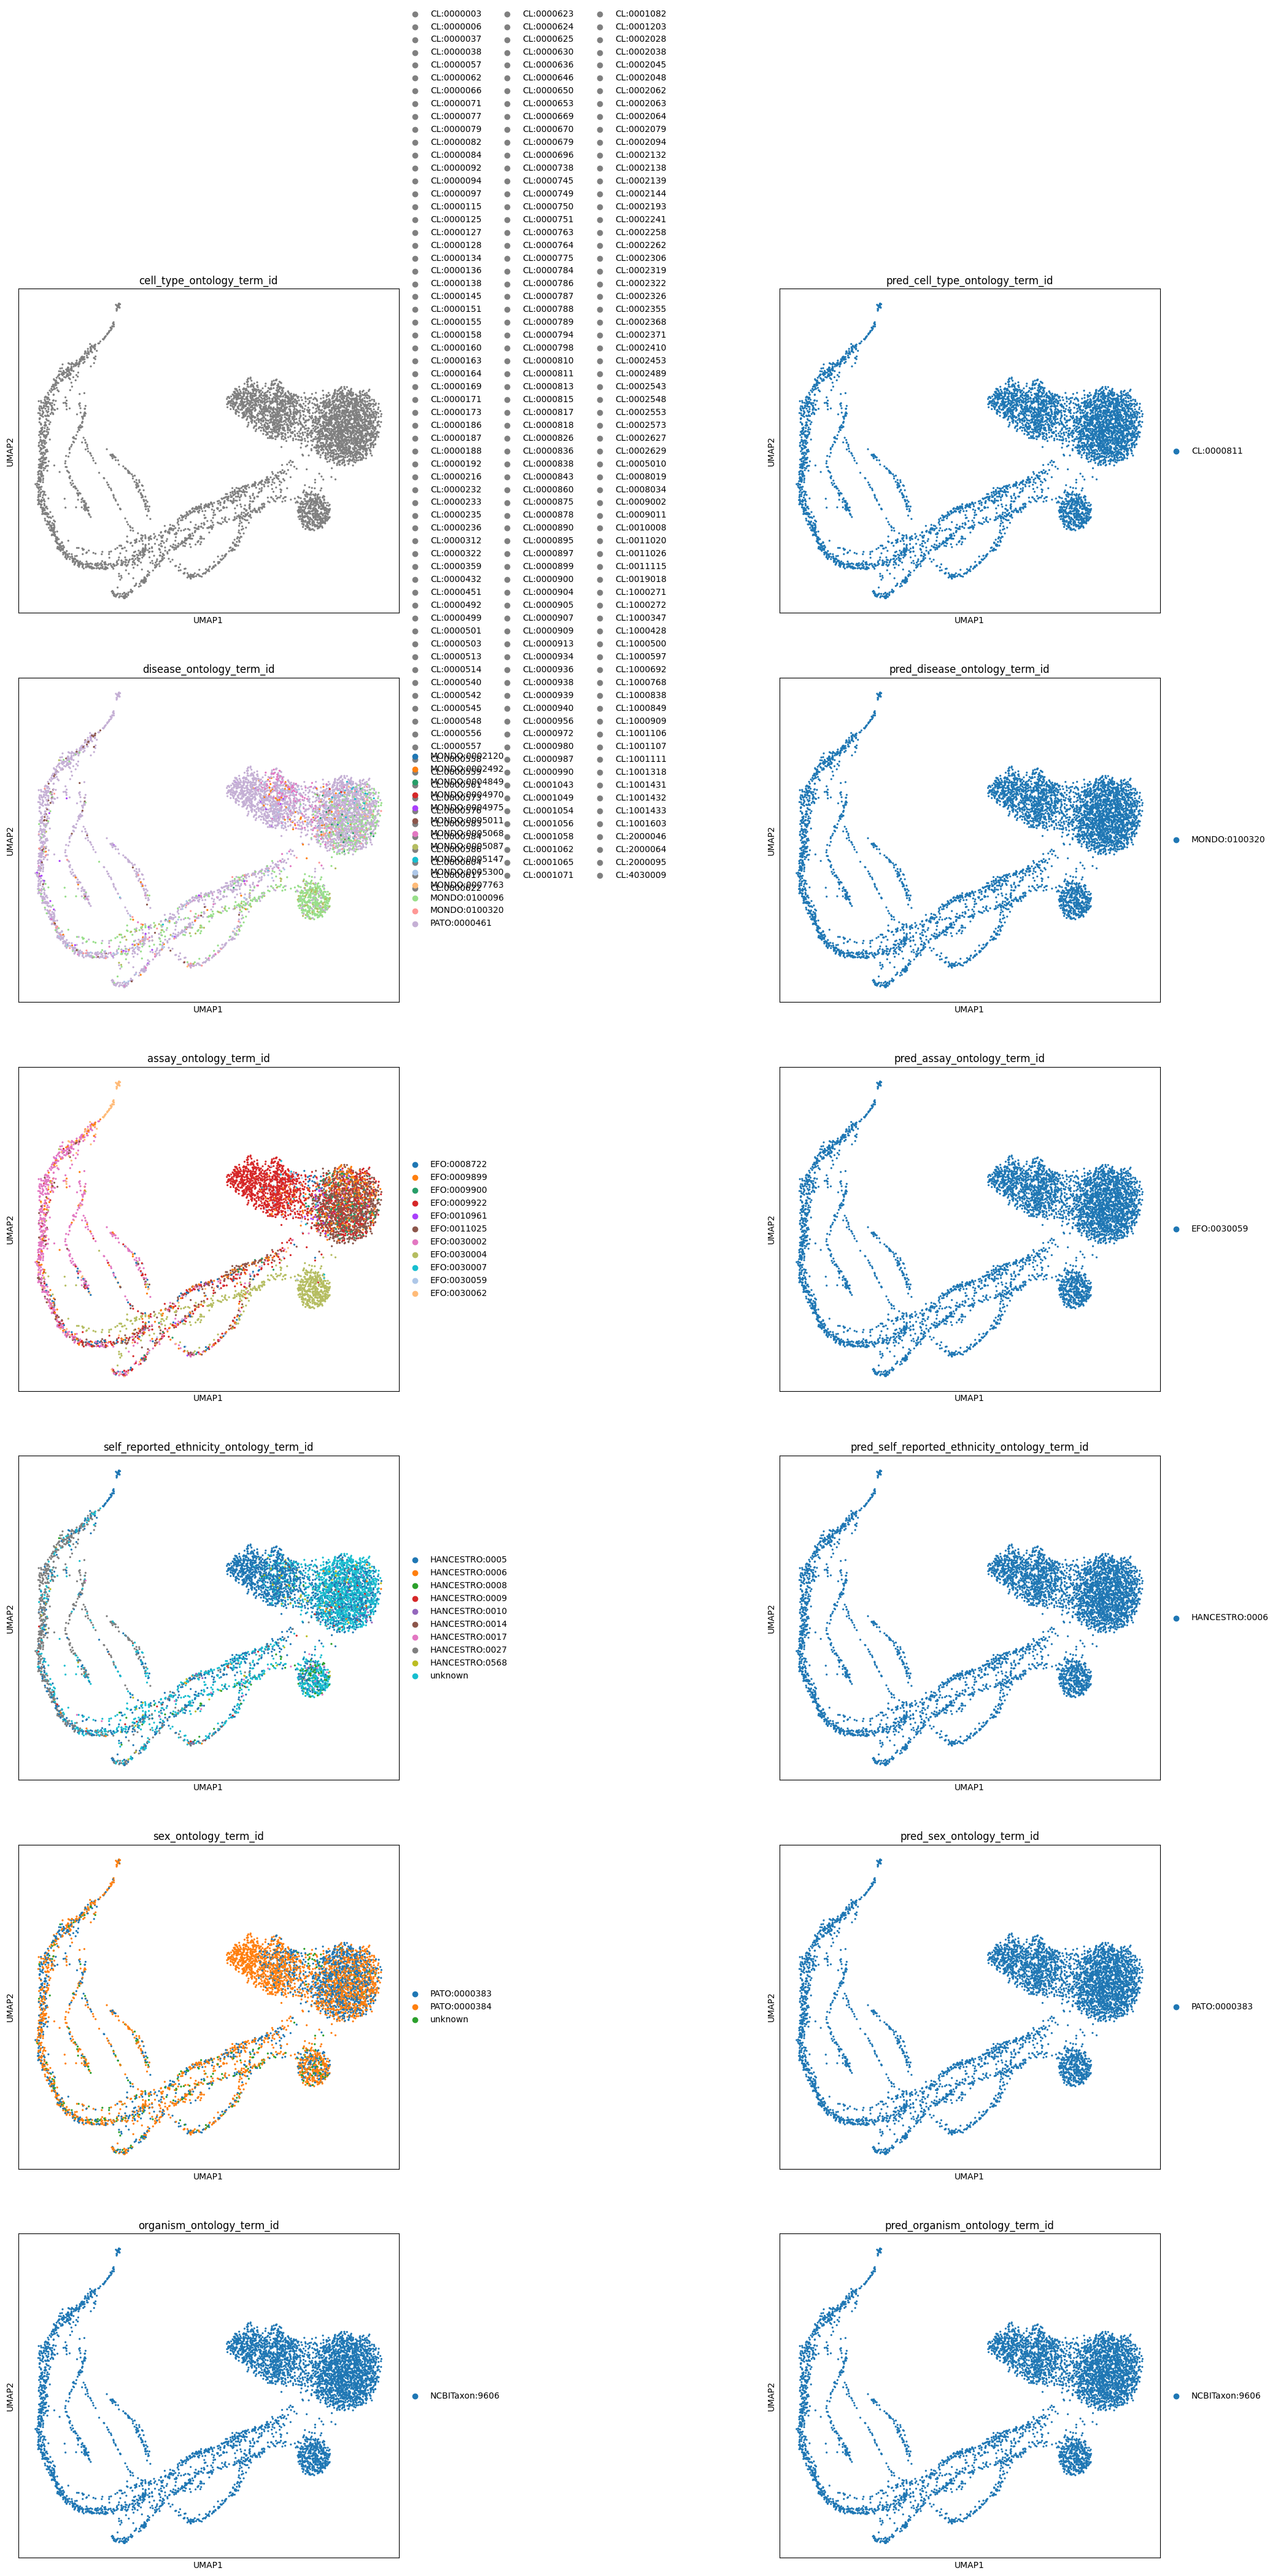

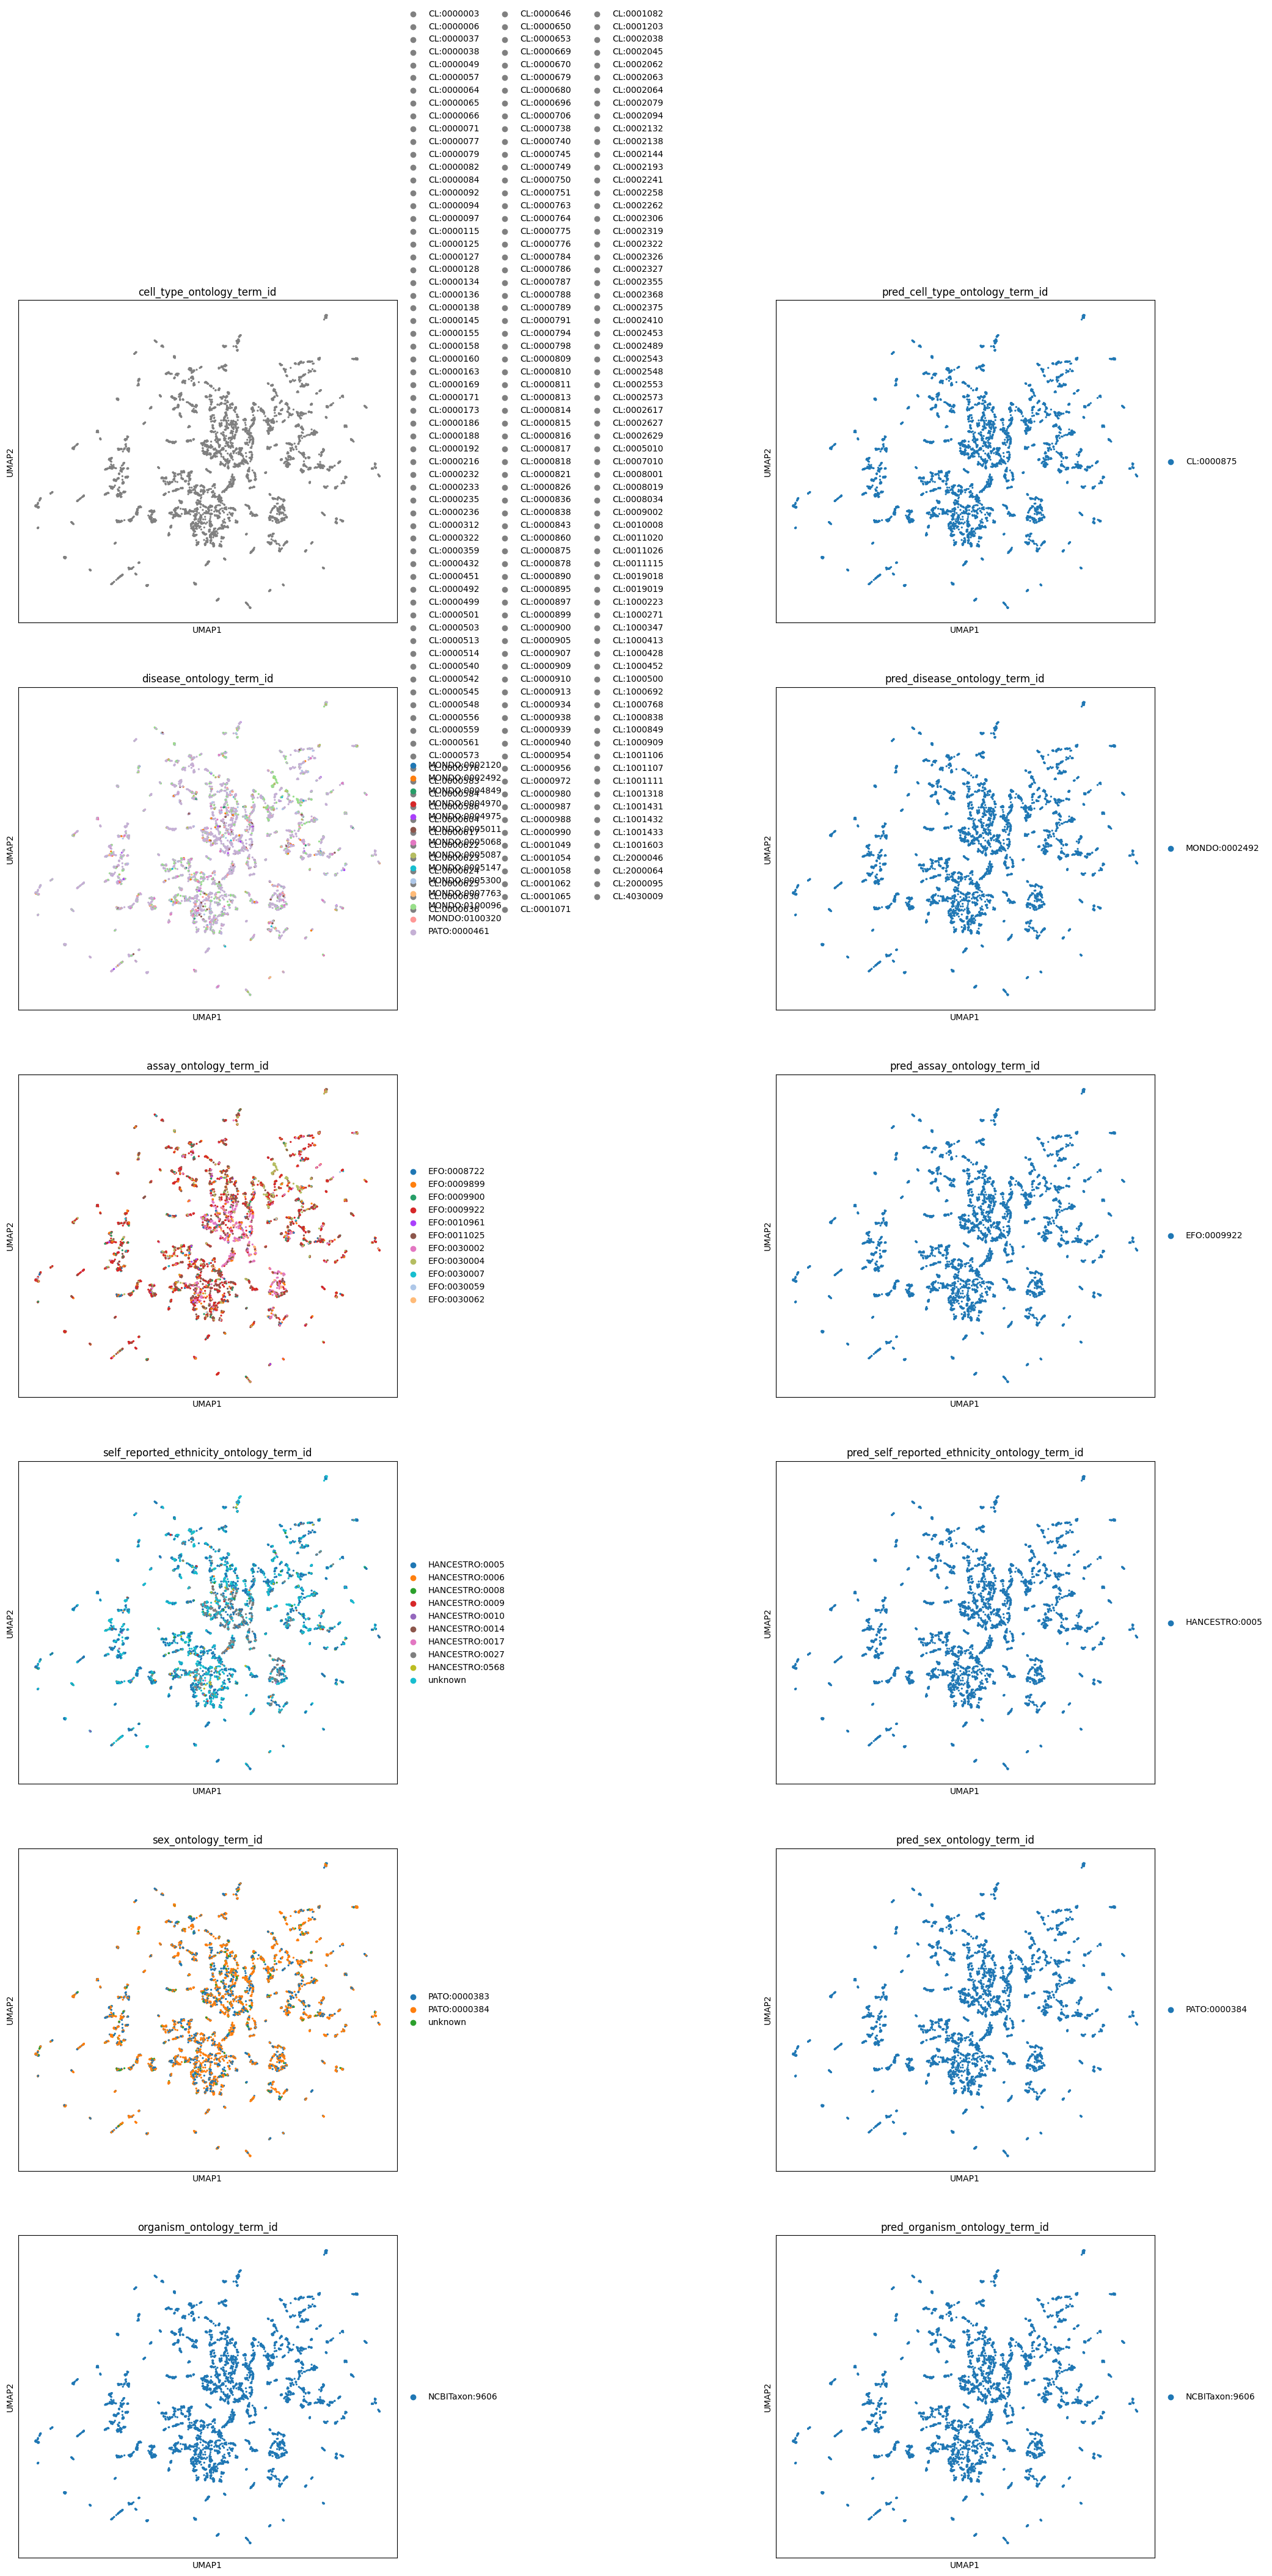

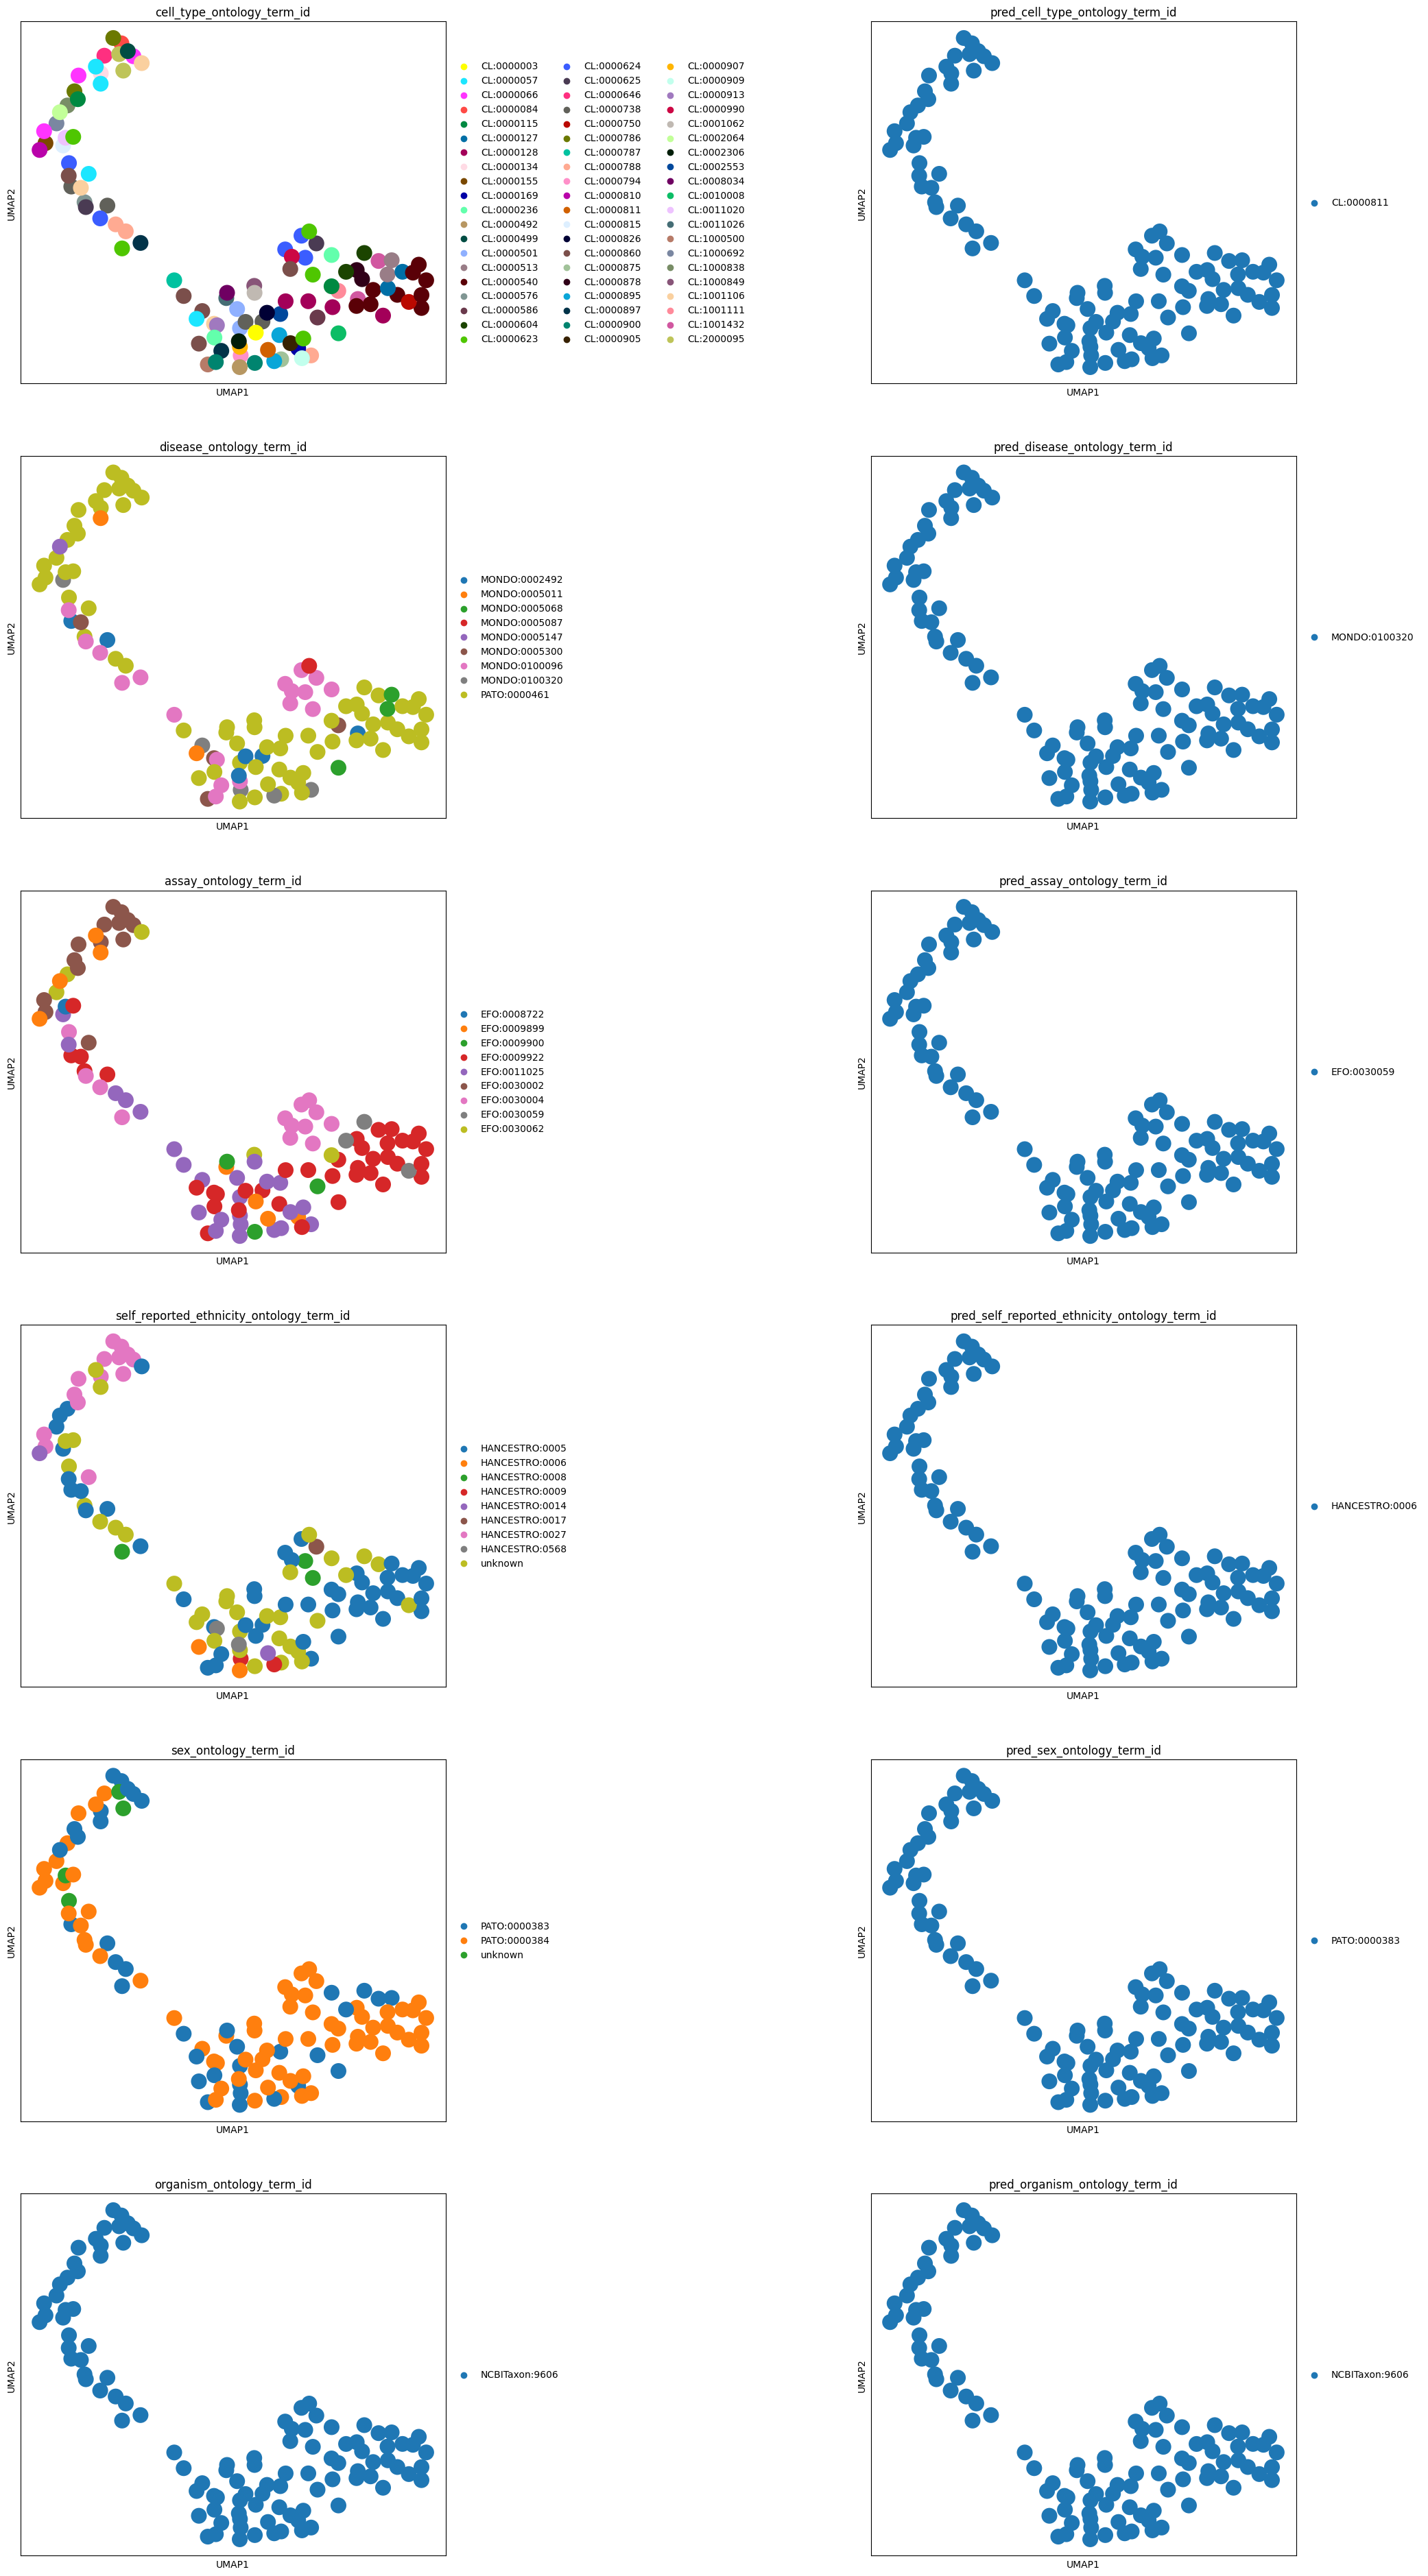

In [9]:
trainer.fit(model, datamodule=datamodule)

In [ ]:
%reload_ext tensorboard
%tensorboard --logdir="../data/tensorboard"

In [9]:
#wandb_logger.finalize(status="aborted")
torch.cuda.empty_cache()

: 

these files will be considered test datasets
    /home/ml4ig1/scprint/.lamindb/BljRloq1xjcxRNDpejzI.h5ad
perc test:  0.00226129182087695


INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2024-02-08 13:58:35,879:INFO - LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


         Falling back to preprocessing with `sc.pp.pca` and default params.


/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


AnnData object with n_obs × n_vars = 3200 × 128
    obs: 'pred_cell_type_ontology_term_id', 'pred_disease_ontology_term_id', 'pred_assay_ontology_term_id', 'pred_self_reported_ethnicity_ontology_term_id', 'pred_sex_ontology_term_id', 'pred_organism_ontology_term_id', 'cell_type_ontology_term_id', 'disease_ontology_term_id', 'assay_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'organism_ontology_term_id', 'leiden'
    uns: 'neighbors', 'umap', 'leiden'
    obsm: 'X_pca', 'X_umap'
    obsp: 'distances', 'connectivities'


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

OutOfMemoryError: CUDA out of memory. Tried to allocate 18.00 MiB (GPU 0; 19.67 GiB total capacity; 1.30 GiB already allocated; 9.19 MiB free; 1.43 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

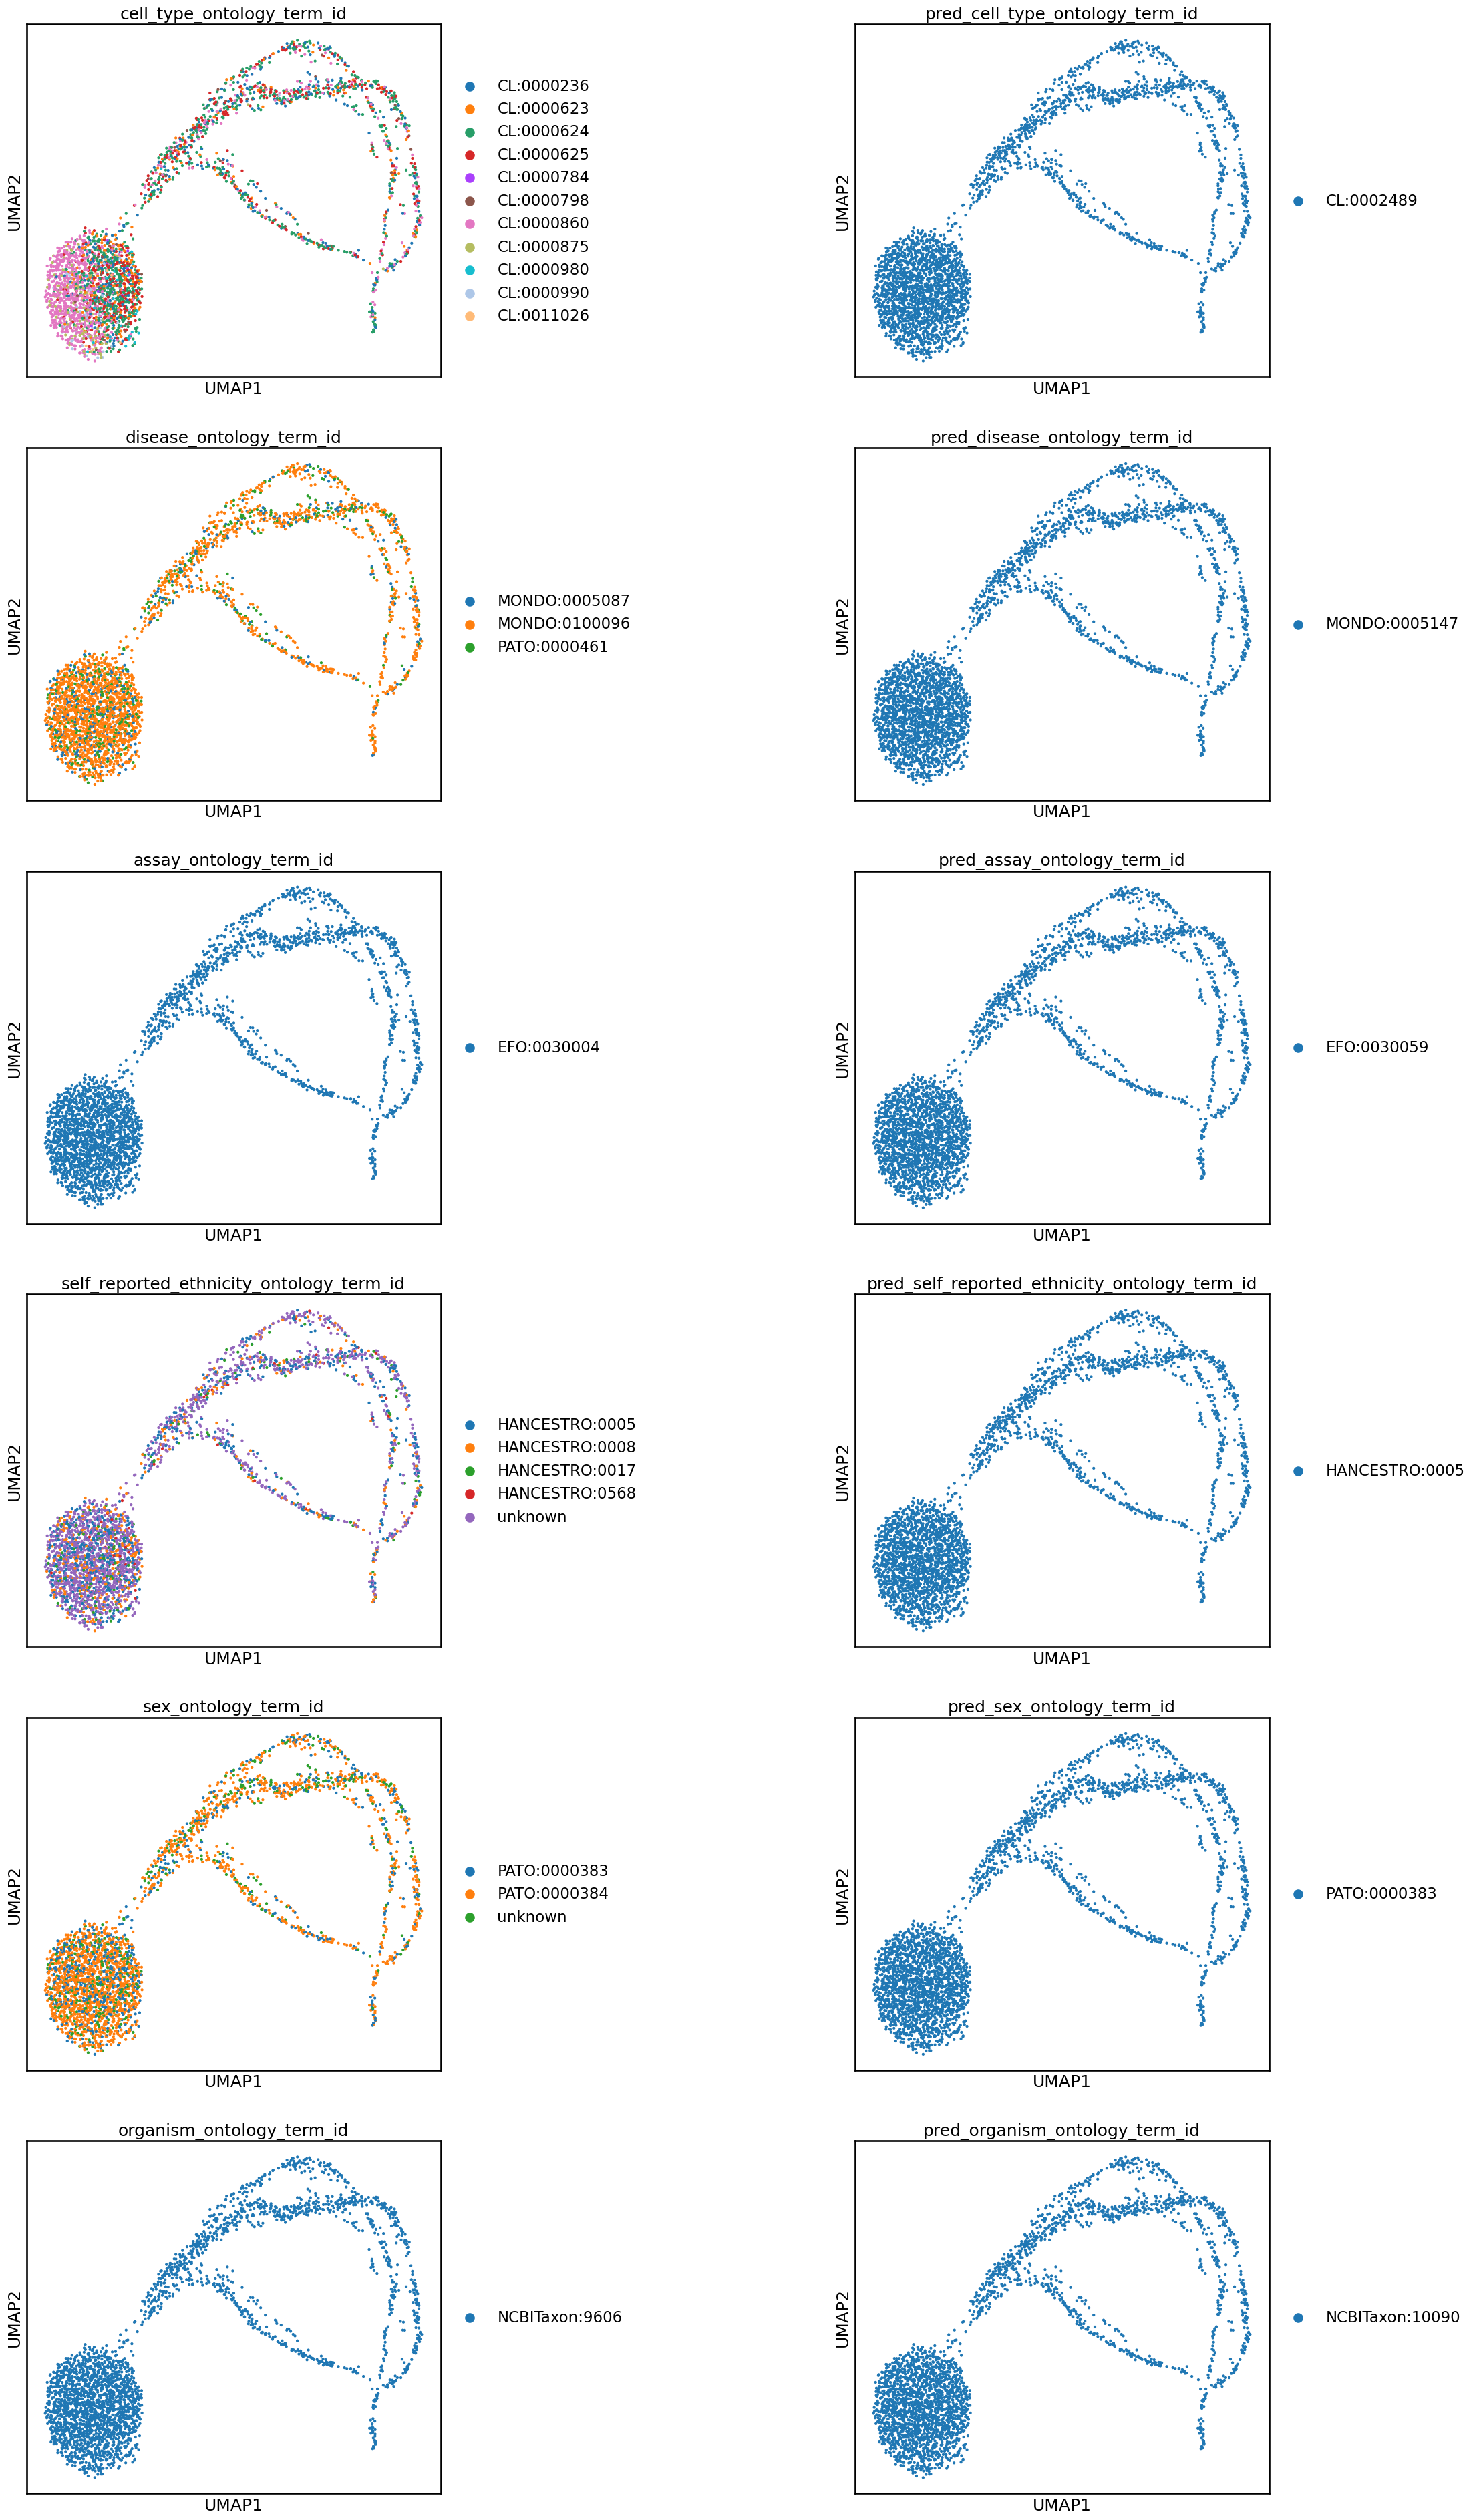

In [40]:
lr_finder = tuner.lr_find(model, datamodule=datamodule)

In [39]:
from lightning.pytorch.tuner import Tuner
tuner = Tuner(trainer)
#tuner.scale_batch_size(model, mode="power") #default
lr_finder = tuner.lr_find(model, datamodule=datamodule)

these files will be considered test datasets
    /home/ml4ig1/scprint/.lamindb/BljRloq1xjcxRNDpejzI.h5ad
perc test:  0.00226129182087695


INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2024-02-08 13:54:48,712:INFO - LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


RuntimeError: indices should be either on cpu or on the same device as the indexed tensor (cpu)

In [1]:
lr_finder

NameError: name 'lr_finder' is not defined

In [32]:
fig = lr_finder.plot(suggest=True)
fig.show()

AttributeError: 'NoneType' object has no attribute 'plot'

In [ ]:
# TODO: test unseen genes (do we see much being kept after filtering and stuff) (0.5 day)
----
# TODO: connect with maestro people to ask for longer compute time 
# TODO: do the same to jean zay (0.5 day)
------
# TODO: make a model benchmark package (continue from where I left off) (4 days)
# TODO: make a task function & make a benchmark function (1 day) (*denoising, *classification, *embeddings, *perturbation prediction)
------
# TODO: debug the gene embedding creation
# TODO: create embedding & make it work for the 4-5 species in the dataset (1 days) 
# TODO: debug the timepoint problem (2 days)
# TODO: find the neighboors and next time point cells (1 days)
# TODO: create a version with next time point and neighboors task (1 days)
# TODO: make a trajectory prediction task (predict future cell type/s, expression) and benchmark (similarity to known future cell, similarity to known future expression) (1 days)
------
# TODO: run a large training on maestro (0.5 day)
------
# TODO: add KO & drug datasets
# TODO: create a version with KO and drug effect prediction